In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import os
import warnings
warnings.filterwarnings("ignore")

# **Read Data**

In [2]:
os.listdir("/kaggle/input/")
df = pd.read_csv("../input/amldata/processedFraud.csv")

# **Exploratory Data Analysis**

In [3]:
df

,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0,7,PAYMENT,11396.93,C512428725,0.00,0.00,M2129874611,0.00,0.00,0,0
1,1,1,PAYMENT,1461.06,C641030345,226.00,0.00,M521466380,0.00,0.00,0,0
2,2,6,TRANSFER,18554.73,C248447628,1018.00,0.00,C1955948959,0.00,18554.73,0,0
3,3,702,CASH_OUT,573266.42,C1802792293,573266.42,0.00,C203516640,0.00,573266.42,1,0
4,4,413,CASH_OUT,781.93,C823598101,781.93,0.00,C1338255129,0.00,781.93,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,1,PAYMENT,8948.03,C788905599,11137.00,2188.97,M1678709153,0.00,0.00,0,0
19996,19996,36,CASH_OUT,819503.92,C510717698,819503.92,0.00,C1469248112,255585.23,1470226.48,1,0
19997,19997,6,TRANSFER,85354.69,C558400671,85354.69,0.00,C527482085,0.00,0.00,1,0
19998,19998,383,TRANSFER,106601.15,C1575202335,106601.15,0.00,C278215975,0.00,0.00,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      20000 non-null  int64  
 1   step            20000 non-null  int64  
 2   type            20000 non-null  object 
 3   amount          20000 non-null  float64
 4   nameOrig        20000 non-null  object 
 5   oldbalanceOrg   20000 non-null  float64
 6   newbalanceOrig  20000 non-null  float64
 7   nameDest        20000 non-null  object 
 8   oldbalanceDest  20000 non-null  float64
 9   newbalanceDest  20000 non-null  float64
 10  isFraud         20000 non-null  int64  
 11  isFlaggedFraud  20000 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 1.8+ MB


In [5]:
#Descriptive stats
df.describe()

,Unnamed: 0,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,20000.000000,20000.000000,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,20000.000000,20000.000000
mean,9999.500000,154.014850,6.640608e+05,1.160773e+06,5.752505e+05,7.414484e+05,1.183187e+06,0.410650,0.000800
std,5773.647028,226.409487,1.689986e+06,2.799618e+06,2.077058e+06,2.928435e+06,3.453401e+06,0.491964,0.028274
min,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,4999.750000,5.000000,8.328507e+03,1.026825e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,9999.500000,7.000000,8.721911e+04,9.339950e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
75%,14999.250000,283.000000,3.990672e+05,8.068633e+05,2.384486e+04,2.110510e+05,6.057667e+05,1.000000,0.000000
max,19999.000000,743.000000,1.000000e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.000000,1.000000


In [6]:
df.corr()

,Unnamed: 0,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
Unnamed: 0,1.000000,-0.006249,-0.009464,-0.004948,0.000168,0.004850,-0.000617,-0.011997,-0.007284
step,-0.006249,1.000000,0.340895,0.146410,-0.100326,-0.036039,0.030994,0.790475,0.047935
amount,-0.009464,0.340895,1.000000,0.698877,0.133697,0.003907,0.244926,0.397084,0.070282
oldbalanceOrg,-0.004948,0.146410,0.698877,1.000000,0.796172,0.067506,0.179667,0.145773,0.067285
newbalanceOrig,0.000168,-0.100326,0.133697,0.796172,1.000000,0.120475,0.076752,-0.153868,0.098668
oldbalanceDest,0.004850,-0.036039,0.003907,0.067506,0.120475,1.000000,0.896061,-0.056212,-0.007164
newbalanceDest,-0.000617,0.030994,0.244926,0.179667,0.076752,0.896061,1.000000,0.023331,-0.009695
isFraud,-0.011997,0.790475,0.397084,0.145773,-0.153868,-0.056212,0.023331,1.000000,0.033898
isFlaggedFraud,-0.007284,0.047935,0.070282,0.067285,0.098668,-0.007164,-0.009695,0.033898,1.000000


In [7]:
df_analysis=pd.pivot_table(df,index=["type"], values=['amount','isFraud','isFlaggedFraud'],aggfunc=[np.sum,np.std], margins=True)
print(df_analysis)

                   sum                                  std                 \
                amount isFlaggedFraud isFraud        amount isFlaggedFraud   
type                                                                         
CASH_IN   3.559579e+08              0       0  1.386172e+05       0.000000   
CASH_OUT  6.247654e+09              0    4116  2.120810e+06       0.000000   
DEBIT     1.296450e+06              0       0  2.650776e+03       0.000000   
PAYMENT   5.228096e+07              0       0  7.423237e+03       0.000000   
TRANSFER  6.624027e+09             16    4097  2.191340e+06       0.055279   
All       1.328122e+10             16    8213  1.689944e+06       0.028273   

                    
           isFraud  
type                
CASH_IN   0.000000  
CASH_OUT  0.445761  
DEBIT     0.000000  
PAYMENT   0.000000  
TRANSFER  0.411059  
All       0.491952  


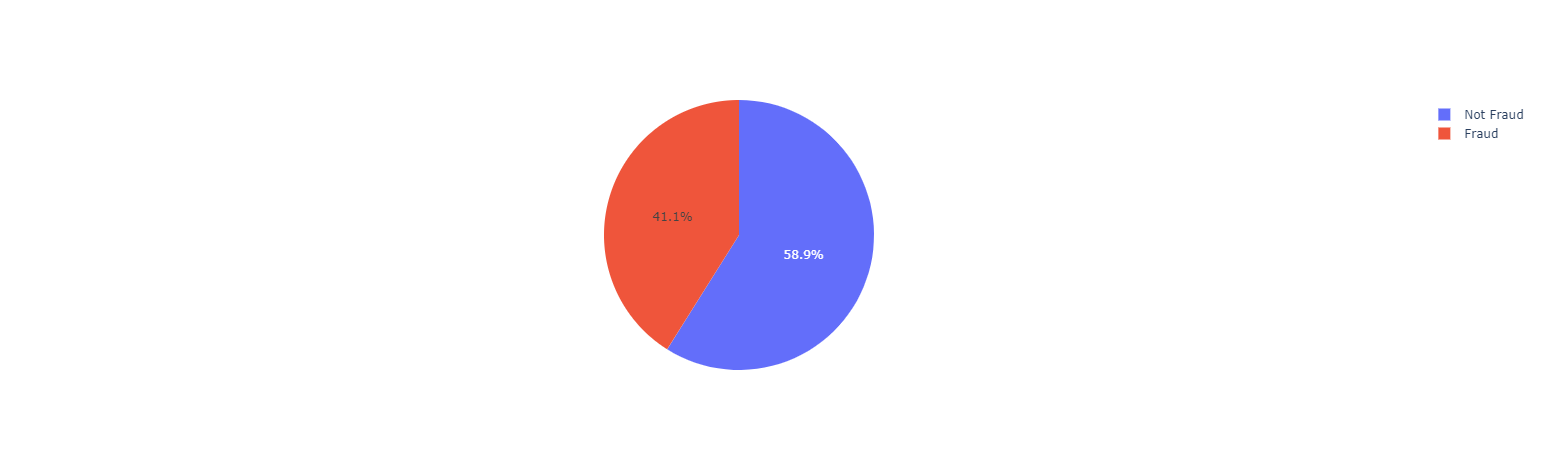

In [8]:
#Check if data is balanced before SMOTE
pie_chart = go.Figure(data=[go.Pie(labels=['Not Fraud','Fraud'], values=df['isFraud'].value_counts())])
pie_chart.show()

In [9]:
from sklearn import preprocessing

df = pd.get_dummies(data = df, columns=['type'])
lenc = preprocessing.LabelEncoder()
df['nameOrig'] = lenc.fit_transform(df['nameOrig'])
df['nameDest'] = lenc.fit_transform(df['nameDest'])
df3 = df.copy()
y = df3['isFraud']
X = df3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify = y)

In [10]:
#Oversampling data with SMOTE because there are very few cases of Fraud
from imblearn.over_sampling import SMOTE


sm = SMOTE(sampling_strategy='minority')
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

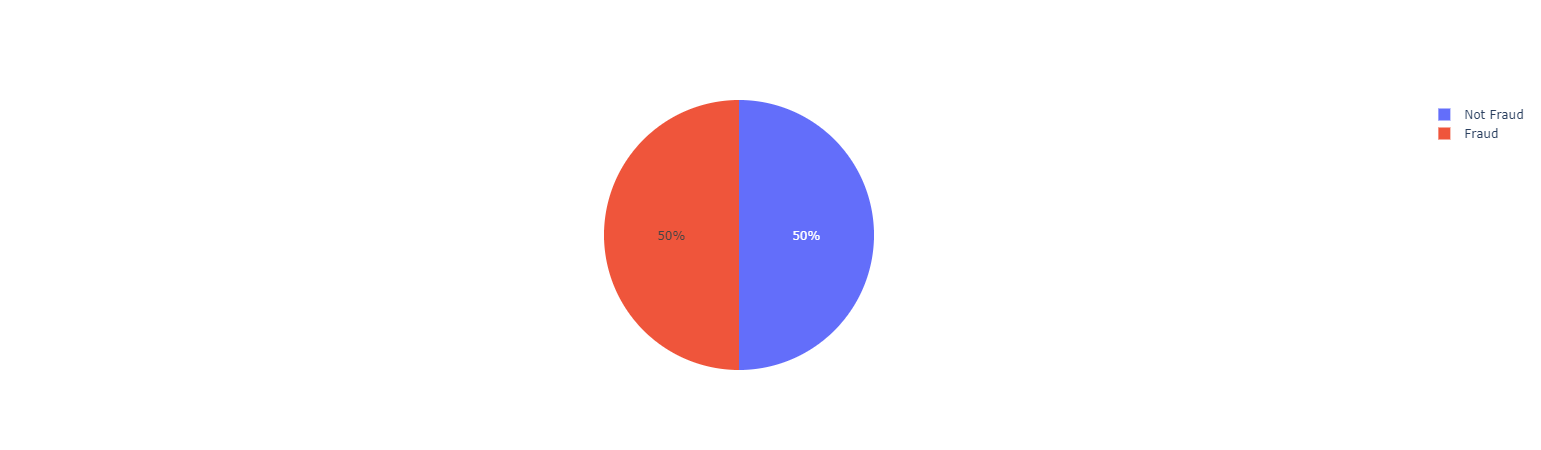

In [11]:
#Check if data is balanced with SMOTE
pie_chart = go.Figure(data=[go.Pie(labels=['Not Fraud','Fraud'], values=X_train['isFraud'].value_counts())])
pie_chart.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      20000 non-null  int64  
 1   step            20000 non-null  int64  
 2   amount          20000 non-null  float64
 3   nameOrig        20000 non-null  int64  
 4   oldbalanceOrg   20000 non-null  float64
 5   newbalanceOrig  20000 non-null  float64
 6   nameDest        20000 non-null  int64  
 7   oldbalanceDest  20000 non-null  float64
 8   newbalanceDest  20000 non-null  float64
 9   isFraud         20000 non-null  int64  
 10  isFlaggedFraud  20000 non-null  int64  
 11  type_CASH_IN    20000 non-null  uint8  
 12  type_CASH_OUT   20000 non-null  uint8  
 13  type_DEBIT      20000 non-null  uint8  
 14  type_PAYMENT    20000 non-null  uint8  
 15  type_TRANSFER   20000 non-null  uint8  
dtypes: float64(5), int64(6), uint8(5)
memory usage: 1.8 MB


# **Preprocessing & Feature Engineering**

In [13]:
!pip3 install sdv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.1/102.1 kB 929.2 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 kB 1.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.6/636.6 kB 26.1 MB/s eta 0:00:00
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.8.4
    Uninstalling graphviz-0.8.4:
      Successfully uninstalled graphviz-0.8.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed

In [ ]:
# from sdv.tabular import CTGAN

# model = CTGAN(primary_key = 'Unnamed: 0', epochs=500, batch_size=100, generator_dim=(256, 256, 256), discriminator_dim=(256, 256, 256))
# model.fit(df)
# #model.save("sdv-ctgan-retail.pkl")
# new_data = model.sample(300)
# new_data

In [15]:
from sdv.tabular import GaussianCopula

df = df.astype({'type_CASH_IN': 'int32'})
df =df.astype({'type_CASH_OUT': 'int32'})
df =df.astype({'type_DEBIT': 'int32'})
df =df.astype({'type_PAYMENT': 'int32'})
df =df.astype({'type_TRANSFER': 'int32'})

model = GaussianCopula()

#model = CTGAN(primary_key='index', epochs=700, batch_size=200, generator_dim=(256, 256, 256), discriminator_dim=(256, 256, 256))
model.fit(df)
#model.save("sdv-ctgan-retail.pkl")
new_data = model.sample(8000000)
new_data

,Unnamed: 0,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,13567,230,1814784.0,11796,2745315.0,1174278.0,1629,2329833.0,1308374.0,1,0,0,0,0,0,1
1,4266,120,485665.0,10452,387967.0,744593.0,8581,6133667.0,6848746.0,0,0,0,1,0,0,0
2,14299,287,1296732.0,11223,5166042.0,1665273.0,7989,905723.0,2393700.0,1,0,0,1,0,1,0
3,12718,151,35633.0,5584,219422.0,733915.0,10221,1597228.0,1102954.0,0,0,0,0,0,1,0
4,12832,574,2177231.0,8719,3143997.0,254675.0,1911,1841755.0,2857015.0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7999995,7616,80,118936.0,12272,215947.0,1498027.0,15356,1233485.0,1288328.0,0,0,0,0,0,1,0
7999996,63,31,522360.0,972,834206.0,2883813.0,11331,4510380.0,5500302.0,0,0,0,0,0,1,0
7999997,3596,70,102259.0,6337,283985.0,1826848.0,5109,1812801.0,1730057.0,0,0,0,0,0,0,1
7999998,12214,604,1695381.0,15069,1599539.0,508390.0,1751,1518315.0,3048060.0,1,0,0,0,0,0,1


In [17]:
from sdv.evaluation import evaluate
#new_data = new_data.drop('index', axis = 1)
evaluate(new_data, df, aggregate = False)

0.7291407734375

In [18]:
df = pd.concat([df, new_data])

In [19]:
df

,Unnamed: 0,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,7,11396.93,14952,0.00,0.0,13197,0.0,0.00,0,0,0,0,0,1,0
1,1,1,1461.06,16231,226.00,0.0,14374,0.0,0.00,0,0,0,0,0,1,0
2,2,6,18554.73,12306,1018.00,0.0,4588,0.0,18554.73,0,0,0,0,0,0,1
3,3,702,573266.42,8433,573266.42,0.0,4948,0.0,573266.42,1,0,0,1,0,0,0
4,4,413,781.93,18142,781.93,0.0,1566,0.0,781.93,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7999995,7616,80,118936.00,12272,215947.00,1498027.0,15356,1233485.0,1288328.00,0,0,0,0,0,1,0
7999996,63,31,522360.00,972,834206.00,2883813.0,11331,4510380.0,5500302.00,0,0,0,0,0,1,0
7999997,3596,70,102259.00,6337,283985.00,1826848.0,5109,1812801.0,1730057.00,0,0,0,0,0,0,1
7999998,12214,604,1695381.00,15069,1599539.00,508390.0,1751,1518315.0,3048060.00,1,0,0,0,0,0,1


In [44]:
#Create Functions for feature engineering
#We need to check the changes in sender's and receiver's balance, and flag when inconsistent (will do)
#We need to check if the amount debited from the sender, went into receiver's account, and flag if not correct
#We have to set a threshold in transaction amount and flag if it goes over it.
#We can create feature that says if the receiving account belongs to a merchant

def flag(df):
    df['actual_newbalanceDest'] = df['oldbalanceDest']+df['amount']  
    for i,rows in df.iterrows():
        if df.iloc[i]['actual_newbalanceDest'] == df.iloc[i]['newbalanceDest']:
            df['balanceDest_flag'] = 0
        else:
            df['balanceDest_flag'] = 1

# def true_balance(df):
#     df['diff_sender'] = df['oldbalanceOrg']-df['newbalanceOrig']
#     df['diff_sender'] = df['diff_sender'].astype(int)
#     for i in df['diff_sender']:
#         if df['diff_sender']-df  
    
#     df['diff_receiver'] = df['oldbalanceDest']-df['newbalanceDest']
            
def thresh_flag(df):
    for i in df['amount']:
        if i>200000:
            df['threshold_flag'] = 1
        else:
            df['threshold_flag'] = 0
            
def detect_M(df):
    x = ['M']
    x2 = list(map(df['nameDest'].str.contains, x))
    df['Merchant'] = np.select(x2, '1', '0')
    
#Function for efficient memory use
def reduce_memory(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                       df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float32)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [ ]:
#Memory reduction in df and feature engineering

flag(df)
thresh_flag(df)
detect_M(df)

In [45]:
reduce_memory(df)

Mem. usage decreased to  0.95 Mb (47.9% reduction)


,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0,7,PAYMENT,11396.929688,C512428725,0.000000e+00,0.000000e+00,M2129874611,0.000000,0.000000e+00,0,0
1,1,1,PAYMENT,1461.060059,C641030345,2.260000e+02,0.000000e+00,M521466380,0.000000,0.000000e+00,0,0
2,2,6,TRANSFER,18554.730469,C248447628,1.018000e+03,0.000000e+00,C1955948959,0.000000,1.855473e+04,0,0
3,3,702,CASH_OUT,573266.437500,C1802792293,5.732664e+05,0.000000e+00,C203516640,0.000000,5.732664e+05,1,0
4,4,413,CASH_OUT,781.929993,C823598101,7.819300e+02,0.000000e+00,C1338255129,0.000000,7.819300e+02,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,1,PAYMENT,8948.030273,C788905599,1.113700e+04,2.188970e+03,M1678709153,0.000000,0.000000e+00,0,0
19996,19996,36,CASH_OUT,819503.937500,C510717698,8.195039e+05,0.000000e+00,C1469248112,255585.234375,1.470226e+06,1,0
19997,19997,6,TRANSFER,85354.687500,C558400671,8.535469e+04,0.000000e+00,C527482085,0.000000,0.000000e+00,1,0
19998,19998,383,TRANSFER,106601.148438,C1575202335,1.066011e+05,0.000000e+00,C278215975,0.000000,0.000000e+00,1,0


In [ ]:
# #Fucntion to calculate Information value with WoE - weight of evidence (not ready)

# def information_value(df, feature, target, pr=0):

#     lst = []

#     for i in range(df[feature].nunique()):
#         val = list(df[feature].unique())[i]
#         lst.append([feature, val, df[df[feature] == val].count()[feature], df[(df[feature] == val) & (df[target] == 1)].count()[feature]])

#     data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Bad'])
#     data = data[data['Bad'] > 0]

#     data['Share'] = data['All'] / data['All'].sum()
#     data['Bad Rate'] = data['Bad'] / data['All']
#     data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
#     data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
#     data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])
#     data['IV'] = (data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])).sum()

#     data = data.sort_values(by=['Variable', 'Value'], ascending=True)

#     if pr == 1:
#         print(data)

#     return data['IV'].values[0]

In [46]:
#Encoding the rest of the object type features
#One-hot encoding for type which has 4 differnet values
#Label encoding for nameOrig and nameDest to avoid curse of dimensionality(if we use one hot encoding here, there will be too many dims)
from sklearn import preprocessing

df = pd.get_dummies(data = df, columns=['type'])
lenc = preprocessing.LabelEncoder()
df['nameOrig'] = lenc.fit_transform(df['nameOrig'])
df['nameDest'] = lenc.fit_transform(df['nameDest'])
#df['Merchant'] = df['Merchant'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      20000 non-null  int16  
 1   step            20000 non-null  int16  
 2   amount          20000 non-null  float32
 3   nameOrig        20000 non-null  int64  
 4   oldbalanceOrg   20000 non-null  float32
 5   newbalanceOrig  20000 non-null  float32
 6   nameDest        20000 non-null  int64  
 7   oldbalanceDest  20000 non-null  float32
 8   newbalanceDest  20000 non-null  float32
 9   isFraud         20000 non-null  int8   
 10  isFlaggedFraud  20000 non-null  int8   
 11  type_CASH_IN    20000 non-null  uint8  
 12  type_CASH_OUT   20000 non-null  uint8  
 13  type_DEBIT      20000 non-null  uint8  
 14  type_PAYMENT    20000 non-null  uint8  
 15  type_TRANSFER   20000 non-null  uint8  
dtypes: float32(5), int16(2), int64(2), int8(2), uint8(5)
memory usage: 918.1 KB


In [20]:
df = df.drop('Unnamed: 0', axis = 1)

In [60]:
df = df.astype({'type_CASH_IN': 'int32'})
df =df.astype({'type_CASH_OUT': 'int32'})
df =df.astype({'type_DEBIT': 'int32'})
df =df.astype({'type_PAYMENT': 'int32'})
df =df.astype({'type_TRANSFER': 'int32'})

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8020000 entries, 0 to 7999999
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   nameOrig        int64  
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   nameDest        int64  
 6   oldbalanceDest  float64
 7   newbalanceDest  float64
 8   isFraud         int64  
 9   isFlaggedFraud  int64  
 10  type_CASH_IN    int32  
 11  type_CASH_OUT   int32  
 12  type_DEBIT      int32  
 13  type_PAYMENT    int32  
 14  type_TRANSFER   int32  
dtypes: float64(5), int32(5), int64(5)
memory usage: 826.0 MB


# **Preparing independent and dependent variables**

In [22]:
#Define dependent and independent variables
df3 = df.copy()
y = df3['isFraud']
X = df3.drop('isFraud', axis = 1)

In [23]:
print(X.shape)
print(y.shape)

(8020000, 14)
(8020000,)


In [24]:
#Create X_train and y_train dfs
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
y_test

# **Over-sampling the training data with SMOTE - Synthetic Minority Oversampling Technique**

# **Modeling**

In [25]:
#fit the model
import lightgbm 

lgb = lightgbm.LGBMClassifier()
lgb.fit(X_train, y_train)

LGBMClassifier()

In [26]:
y_pred=lgb.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy: 0.8800


In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1211235  139144]
 [ 149462  906159]]

True Positives(TP) =  1211235

True Negatives(TN) =  906159

False Positives(FP) =  139144

False Negatives(FN) =  149462


<AxesSubplot:>

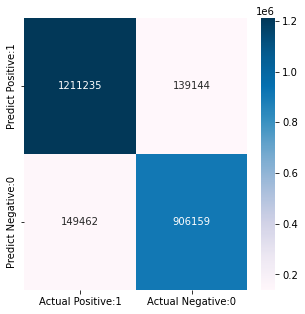

In [29]:
confusion_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

fig, ax = plt.subplots(figsize=(5,5)) 
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap = 'PuBu', ax = ax)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89   1350379
           1       0.87      0.86      0.86   1055621

    accuracy                           0.88   2406000
   macro avg       0.88      0.88      0.88   2406000
weighted avg       0.88      0.88      0.88   2406000



In [31]:
#F1_macro is a better indicator of the model performance, since it is the harmonic mean between precision and sensitivity
#Accuracy is not a good indicator in cases of target feature label imbalance
from sklearn.metrics import f1_score, accuracy_score
print('Accuracy:', round(accuracy_score(y_test, y_pred),3))
print('F1_macro:',round(f1_score(y_test, y_pred, average='macro'),2))

Accuracy: 0.88
F1_macro: 0.88


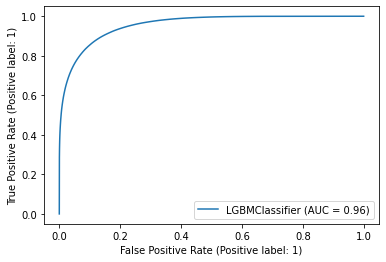

In [32]:
import scikitplot as skplt

metrics.plot_roc_curve(lgb, X_test, y_test)
plt.show()

# **Model Interpretability**

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

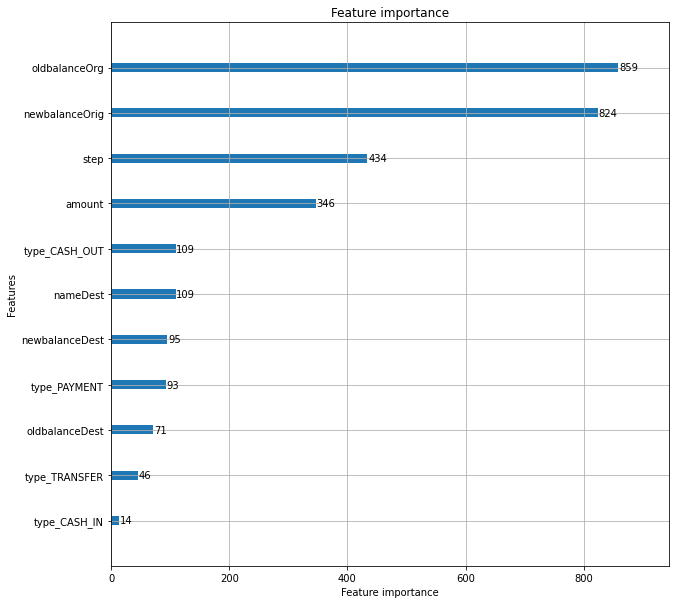

In [33]:
plt.rcParams["figure.figsize"] = (10, 10)

lightgbm.plot_importance(lgb)

In [34]:
#Looking at model weights to explain predictions
import eli5
eli5.show_weights(lgb)

Weight,Feature
0.6830,step
0.1120,oldbalanceOrg
0.0946,newbalanceOrig
0.0438,type_PAYMENT
0.0160,type_CASH_OUT
0.0156,amount
0.0110,nameDest
0.0110,oldbalanceDest
0.0085,type_TRANSFER
0.0043,newbalanceDest


# **Explainable AI**

In [ ]:
import shap
explainer = shap.TreeExplainer(lgb, feature_perturbation="interventional", model_output="raw")
shap_values = explainer.shap_values(X_train)
expected_value = explainer.expected_value

In [ ]:
shap.summary_plot(shap_values, X,title="SHAP summary plot") 

In [ ]:
shap.summary_plot(shap_values[0], X_train, plot_type = 'violin') 

In [ ]:
#shap.force_plot(explainer.expected_value[0], shap_values[0], X_train)